In [1]:
! pip install transformers

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/977.5 kB ? eta -:--:--
     -                                        30.7/977.5 kB ? eta -:--:--
     -                                     41.0/977.5 kB 495.5 kB/s eta 0:00:02
     --                                    71.7/977.5 kB 563.7 kB/s eta 0:00:02
     ---                                   92.2/977.5 kB 525.1 kB/s eta 0:00:02
     ---                                   92.2/977.5 kB 525.1 kB/s eta 0:00:02
     ---                                   92.2/977.5 kB 525.1 kB/s eta 0:00:02
     ---                                   92.2/977.5 kB 525.1 kB/s eta 0:00:02
     ---                                   92.2/977.5 kB 525.1 kB/s eta 0:00:02
     -----                                153.6/977.5 kB 340.5 kB/s eta 0:00:03
     -----                                153.6/977.5 kB 340.5 kB/s eta 0:00:03
     -----                                153.6/977.5 k

In [7]:
pip install torchvision 

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/1.1 MB ? eta -:--:--
     -                                        0.0/1.1 MB ? eta -:--:--
     --                                       0.1/1.1 MB 1.1 MB/s eta 0:00:01
     ----                                     0.1/1.1 MB 1.0 MB/s eta 0:00:01
     ------                                   0.2/1.1 MB 1.0 MB/s eta 0:00:01
     --------                                 0.3/1.1 MB 1.2 MB/s eta 0:00:01
     -------------                            0.4/1.1 MB 1.6 MB/s eta 0:00:01
     --------------------                     0.6/1.1 MB 1.9 MB/s eta 0:00:01
     ----------------------------             0.8/1.1 MB 2.3 MB/s eta 0:00:01
     ----------------------------------       1.0/1.1 MB 2.6 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 2.6 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers.modeling_bert import BertModel, BertForMaskedLM
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

Load dataset

In [10]:
fake_data=pd.read_csv("Fake.csv")
real_data=pd.read_csv("True.csv")

Data Analysis

In [11]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


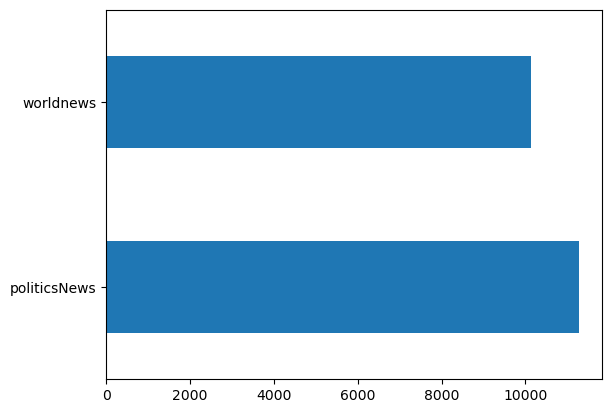

In [13]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5
    

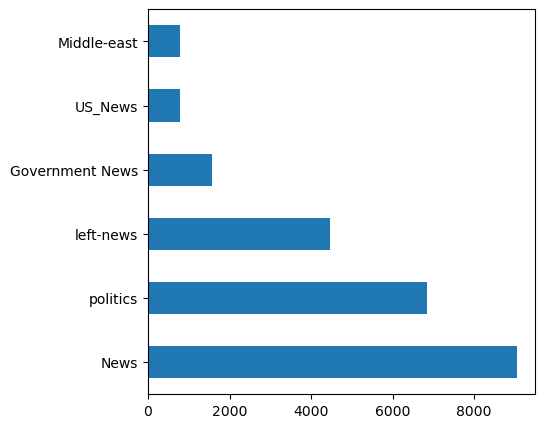

In [14]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

wordcloud real text data

In [ ]:
wordcld_mask=np.array(Image.open("../input/wodcloud-twiter-pic/twitter.png"))

In [ ]:
wordcld_text=" ".join(real_data["text"].tolist())

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

wordcloud fake text data

In [ ]:
fake_text=" ".join(fake_data["text"].tolist())

In [ ]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
fake_data["label"]="fake"
real_data["label"]="real"

In [16]:
final_data= pd.concat([fake_data,real_data])

In [17]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [18]:
final_data.head(10)

,title,text,subject,date,label
0,"Clinton, Trump draw battle lines for ill-tempe...",WASHINGTON (Reuters) - U.S. presidential candi...,politicsNews,"June 6, 2016",real
1,"A Monkey Knocked Out Kenya’s Power Grid, So C...","On Tuesday, all of Kenya went dark for more th...",News,"June 8, 2016",fake
2,BOX OFFICE BOMB: Seth Rogan Tweeted F*ck You T...,Who s laughing now funny guy?We asked everyo...,politics,"Oct 26, 2015",fake
3,OBAMA MAKES THE OLYMPICS ABOUT DIVERSITY AND I...,I ll bet Obama didn t count on this beautiful ...,politics,"Aug 7, 2016",fake
4,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",real
5,Ted Cruz Refuses To Meet With TX Muslims Beca...,Ted Cruz just keeps proving that he does not l...,News,"April 18, 2016",fake
6,Russia establishing permanent presence at its ...,MOSCOW (Reuters) - Russia has started establis...,worldnews,"December 26, 2017",real
7,"House votes to repeal U.S. retirement rule, Ob...",WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"April 28, 2016",real
8,"Bomb kills three, including senior police offi...","QUETTA, Pakistan (Reuters) - A suicide bomber ...",worldnews,"November 9, 2017",real
9,WATCH: Ted Cruz Pushes Birther’s Bizarre Star...,Ted Cruz is promoting the work of a birther fi...,News,"January 6, 2016",fake


In [19]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [20]:
final_data.drop(["subject","date"], axis=1)

,title,text,label
0,"Clinton, Trump draw battle lines for ill-tempe...",WASHINGTON (Reuters) - U.S. presidential candi...,real
1,"A Monkey Knocked Out Kenya’s Power Grid, So C...","On Tuesday, all of Kenya went dark for more th...",fake
2,BOX OFFICE BOMB: Seth Rogan Tweeted F*ck You T...,Who s laughing now funny guy?We asked everyo...,fake
3,OBAMA MAKES THE OLYMPICS ABOUT DIVERSITY AND I...,I ll bet Obama didn t count on this beautiful ...,fake
4,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,real
...,...,...,...
44893,"Congress rejects Obama veto, Saudi September 1...",WASHINGTON (Reuters) - Congress on Wednesday o...,real
44894,Trump asked Comey to shut down Flynn probe: so...,WASHINGTON (Reuters) - President Donald Trump ...,real
44895,Trump budget chief under fire over attack on C...,WASHINGTON (Reuters) - The White House’s budge...,real
44896,WOW! WATCH OBAMA’S 5 MOST Threatening Comments...,A young patriot made this video to show the hy...,fake


In [21]:
final_data.head()

,title,text,subject,date,label
0,"Clinton, Trump draw battle lines for ill-tempe...",WASHINGTON (Reuters) - U.S. presidential candi...,politicsNews,"June 6, 2016",real
1,"A Monkey Knocked Out Kenya’s Power Grid, So C...","On Tuesday, all of Kenya went dark for more th...",News,"June 8, 2016",fake
2,BOX OFFICE BOMB: Seth Rogan Tweeted F*ck You T...,Who s laughing now funny guy?We asked everyo...,politics,"Oct 26, 2015",fake
3,OBAMA MAKES THE OLYMPICS ABOUT DIVERSITY AND I...,I ll bet Obama didn t count on this beautiful ...,politics,"Aug 7, 2016",fake
4,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",real


In [22]:
final_data.label.value_counts()

fake    23481
real    21417
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

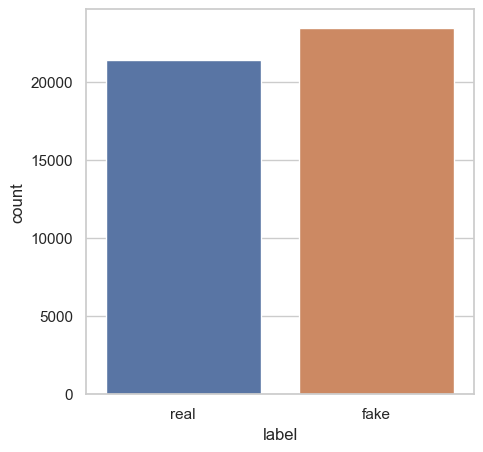

In [23]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [24]:
final_data.head(5)

,title,text,subject,date,label
0,"Clinton, Trump draw battle lines for ill-tempe...",WASHINGTON (Reuters) - U.S. presidential candi...,politicsNews,"June 6, 2016",real
1,"A Monkey Knocked Out Kenya’s Power Grid, So C...","On Tuesday, all of Kenya went dark for more th...",News,"June 8, 2016",fake
2,BOX OFFICE BOMB: Seth Rogan Tweeted F*ck You T...,Who s laughing now funny guy?We asked everyo...,politics,"Oct 26, 2015",fake
3,OBAMA MAKES THE OLYMPICS ABOUT DIVERSITY AND I...,I ll bet Obama didn t count on this beautiful ...,politics,"Aug 7, 2016",fake
4,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",real


In [25]:
final_data["text"]=final_data["title"]+final_data["text"]

In [26]:
final_data=final_data[["text","label"]]

In [27]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

In [28]:
final_data.sample(5)

,text,label
41166,McCain vows to block proposed separation of NS...,1
1363,Trump Gets SKEWERED For Trying To Take Credit...,0
25332,"Clinton 'extremely careless' with emails, but ...",1
2887,BOOM! DONALD TRUMP HAMMERS BERNIE SANDERS WITH...,0
18377,WHY WOULD OBAMA ALLOW GREEN BERET To Be Discha...,0


In [29]:
final_data.label[9943]

0

In [30]:
final_data.text[36709]

'LONDON’S MUSLIM MAYOR DEMANDS MORE POWER: “On behalf of all Londoners, I am demanding more autonomy for the capital – right now”This is the same Muslim mayor who recently banned  sexy women  from advertisements in London Sadiq Khan today called for London to  take back control  of its own destiny in the aftermath of the EU referendum.The Mayor issued a demand for more tax-raising powers  right now  as well as far-reaching command of public services.His devolution wish-list stopped short of calling for London, the only English region to vote to stay within the EU, as a city-state.But he stressed the extra powers would be necessary to protect the capital s economy, jobs and prosperity from the uncertainty of Brexit ahead.They include greater financial autonomy, as well as wide-ranging control over business and skills, housing and planning, transport, health and criminal justice.It comes as a petition calling on the Mayor to declare London independent hit more than 170,000 signatures in 

In [31]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]


In [32]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

100%|███████████████████████████████████████████████████████████████████████| 231508/231508 [00:01<00:00, 201239.99B/s]


In [33]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

100%|████████████████████████████████████████████████████████████████| 536063208/536063208 [07:41<00:00, 1160326.57B/s]


In [34]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [38]:
def tokenize(X):
    
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [39]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

TypeError: 'BertTokenizer' object is not callable

In [41]:
maxlen=100

create bert model

In [42]:
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model
    
    

In [43]:
model=create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  ((None, 100, 768),           1094822   ['input_1[0][0]',             
 )                            (None, 768))                40         'input_2[0][0]']             
                                                                                                  
 dropout_37 (Dropout)        (None, 768)                  0         ['tf_bert_model[0][1]']   

In [44]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

ValueError: decay is deprecated in the new Keras optimizer, please check the docstring for valid arguments, or use the legacy optimizer, e.g., tf.keras.optimizers.legacy.Adam.

In [45]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [46]:
history = model.fit(x = {'input_1':X_train_token['input_ids'],'input_2':X_train_token['attention_mask']}, y = Y_train, epochs=10, validation_split = 0.2, batch_size = 30, callbacks=[callback])

NameError: name 'X_train_token' is not defined

In [47]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [48]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


NameError: name 'history' is not defined

In [49]:
y_pred = np.where(model.predict({ 'input_1' : X_test_token['input_ids'] , 'input_2' : X_test_token['attention_mask']}) >=0.5,1,0)

NameError: name 'X_test_token' is not defined

Confusion matrix

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred))

Custom data prediction

In [ ]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"

In [ ]:
test_token = tokenize(test_text)

In [ ]:
test_text_pred = np.where(model.predict({ 'input_1' : test_token['input_ids'] , 'input_2' : test_token['attention_mask']}) >=0.5,1,0)

In [ ]:
test_text_pred

In [ ]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")